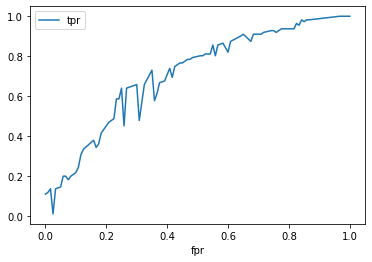

In [1]:
import pandas as pd

df=pd.read_csv('/home/ishanu/Dropbox/gibbons_global/code/roc_cat.csv',index_col=0).sort_values('fpr')
df=df.groupby('fpr').max().reset_index()
df.set_index('fpr').plot()
df.set_index('fpr').to_csv('tmp.csv')


local version 1


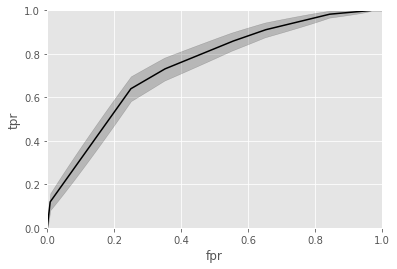

In [12]:
import zedstat 
import pylab as plt
plt.style.use('ggplot')
zt=zedstat.processRoc(df=pd.read_csv('/home/ishanu/Dropbox/gibbons_global/code/roc_cat.csv',index_col=0),
           order=3, 
           total_samples=502+470,
           positive_samples=470,
           alpha=0.01,
           prevalence=470/(502+470))
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [13]:
zt.auc()

(0.7457975233905985, 0.7844197368450332, 0.707175650944931)

In [10]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-
fpr,,,,,,
0.000,0.000000,1.000000,0.516461,0.516461,8.430669,1.000000
0.001,0.013410,0.884549,0.522346,0.519561,13.409611,0.987749
0.002,0.026026,0.914835,0.528013,0.522589,13.013013,0.975926
0.003,0.039039,0.925513,0.533788,0.525716,13.013013,0.963853
0.004,0.052052,0.930960,0.539564,0.528888,13.013013,0.951755
...,...,...,...,...,...,...
0.996,1.000000,0.484540,0.485605,1.000000,1.004016,0.000000
0.997,1.000000,0.484289,0.485088,1.000000,1.003009,0.000000
0.998,1.000000,0.484039,0.484572,1.000000,1.002004,0.000000


In [11]:
zt._auc

{'U': array([0.78441974]),
 'L': array([0.70717565]),
 'nominal': 0.7457975233905985}